# Описание данных

Данные - специально подготовленная выборка из полного набора, описанного здесь: https://mengtingwan.github.io/data/goodreads#datasets с дополнениями из https://www.kaggle.com/datasets/austinreese/goodreads-books:
- books: перечень книг (~44 тыс.) из списка https://www.goodreads.com/list/show/1.Best_Books_Ever (совпадение по book id),
- interactions: взаимодействие пользователей с книгами

Основной массив данных был собран в конце 2017.

# Инициализация

In [44]:
import logging

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

Создаём логгер, который удобен для использования в ноутбуке.

# Load Data

Загружаем данные как они есть, начинаем на них смотреть: какие в них есть сущности, атрибуты, распределения.

In [46]:
books = pd.read_parquet("books.parquet")

In [47]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 3 to 2360448
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               43312 non-null  int64  
 1   author                43312 non-null  object 
 2   title                 43312 non-null  object 
 3   description           43312 non-null  object 
 4   genre_and_votes       43312 non-null  object 
 5   num_pages             37001 non-null  Int64  
 6   average_rating        43312 non-null  float64
 7   ratings_count         43312 non-null  Int64  
 8   text_reviews_count    43312 non-null  int64  
 9   publisher             43312 non-null  object 
 10  publication_year      35891 non-null  Int64  
 11  country_code          43312 non-null  object 
 12  language_code         43312 non-null  object 
 13  format                43312 non-null  object 
 14  is_ebook              43312 non-null  bool   
 15  isbn                  

Пример данных по книгам

In [48]:
print(books[["book_id", "author", "title", "num_pages", "average_rating"]].sample(5, random_state=52).sort_values("book_id").set_index("book_id").to_string())

                                             author                                            title  num_pages  average_rating
book_id                                                                                                                        
69882                 Heinrich Böll, Patrick Bowles                      Billiards at Half-Past Nine        288            3.93
267533                               Robert Cormier                                         8 Plus 1        173            3.67
820966    Martin Luther, J.I. Packer, O.R. Johnston                          The Bondage of the Will        322            4.17
4532622                               Karen Hancock                                      The Enclave        492            3.82
20444381                             Diana Gabaldon  Os tambores de outono - 1ª Parte (Outlander #4)       1048            3.99


In [49]:
interactions = pd.read_parquet("interactions.parquet")

Можно оценить объём данных о взаимодействиях

In [50]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12890434 entries, 0 to 12914458
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   book_id      int64 
 2   started_at   object
 3   read_at      object
 4   is_read      bool  
 5   rating       int64 
 6   is_reviewed  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 614.7+ MB


Пример данных по взаимодействиям

In [51]:
print(interactions[["user_id", "book_id", "started_at", "read_at", "is_read", "rating"]].sample(5, random_state=52).sort_values("user_id").set_index(["user_id", "book_id"]).to_string())

                                           started_at     read_at  is_read  rating
user_id                          book_id                                          
0447747f44c0d8d1a08cf329fe253f29 10054335  2016-04-08  2016-04-20     True       3
14432756ffba6357686f09e4ccc332bb 26252859  2016-05-27  2016-05-30     True       5
46d6c8cf548d1c86abb671f42ba71b5e 960       2014-08-06  2016-10-29     True       5
71c2b3714945af1f700f49953904c510 18492859  2014-10-09  2014-10-12     True       5
7802bafdeac8abff23a72b9dd60b1dd1 18710190  2015-03-01  2015-05-05     True       4


# EDA

Посмотрим на данные о книгах, какие поля есть.

In [9]:
books.sample(3).T

,313919,938503,1424552
book_id,11797160,7252256,269041
author,Art Markman,Laura Griffin,Sadhguru
title,Smart Thinking: Three Essential Keys to Solve ...,"Unspeakable (Tracers, #2)",Mystic's Musings
description,"When you understand how the mind works, you ca...",Elaina McCord Wants to Find a Killer.\nBut He'...,
genre_and_votes,"{'Psychology': 36, 'Nonfiction': 34, 'Self Hel...","{'Romance-Romantic Suspense': 139, 'Romance': ...","{'Spirituality': 22, 'Philosophy': 6, 'Self He..."
num_pages,<NA>,384,<NA>
average_rating,3.67,4.01,4.6
ratings_count,786,2185,301
text_reviews_count,62,170,27
publisher,,Pocket Books Romance,


Посмотрим на данные о взаимодействиях пользователей с книгами.

In [10]:
books["book_id"].nunique()

43312

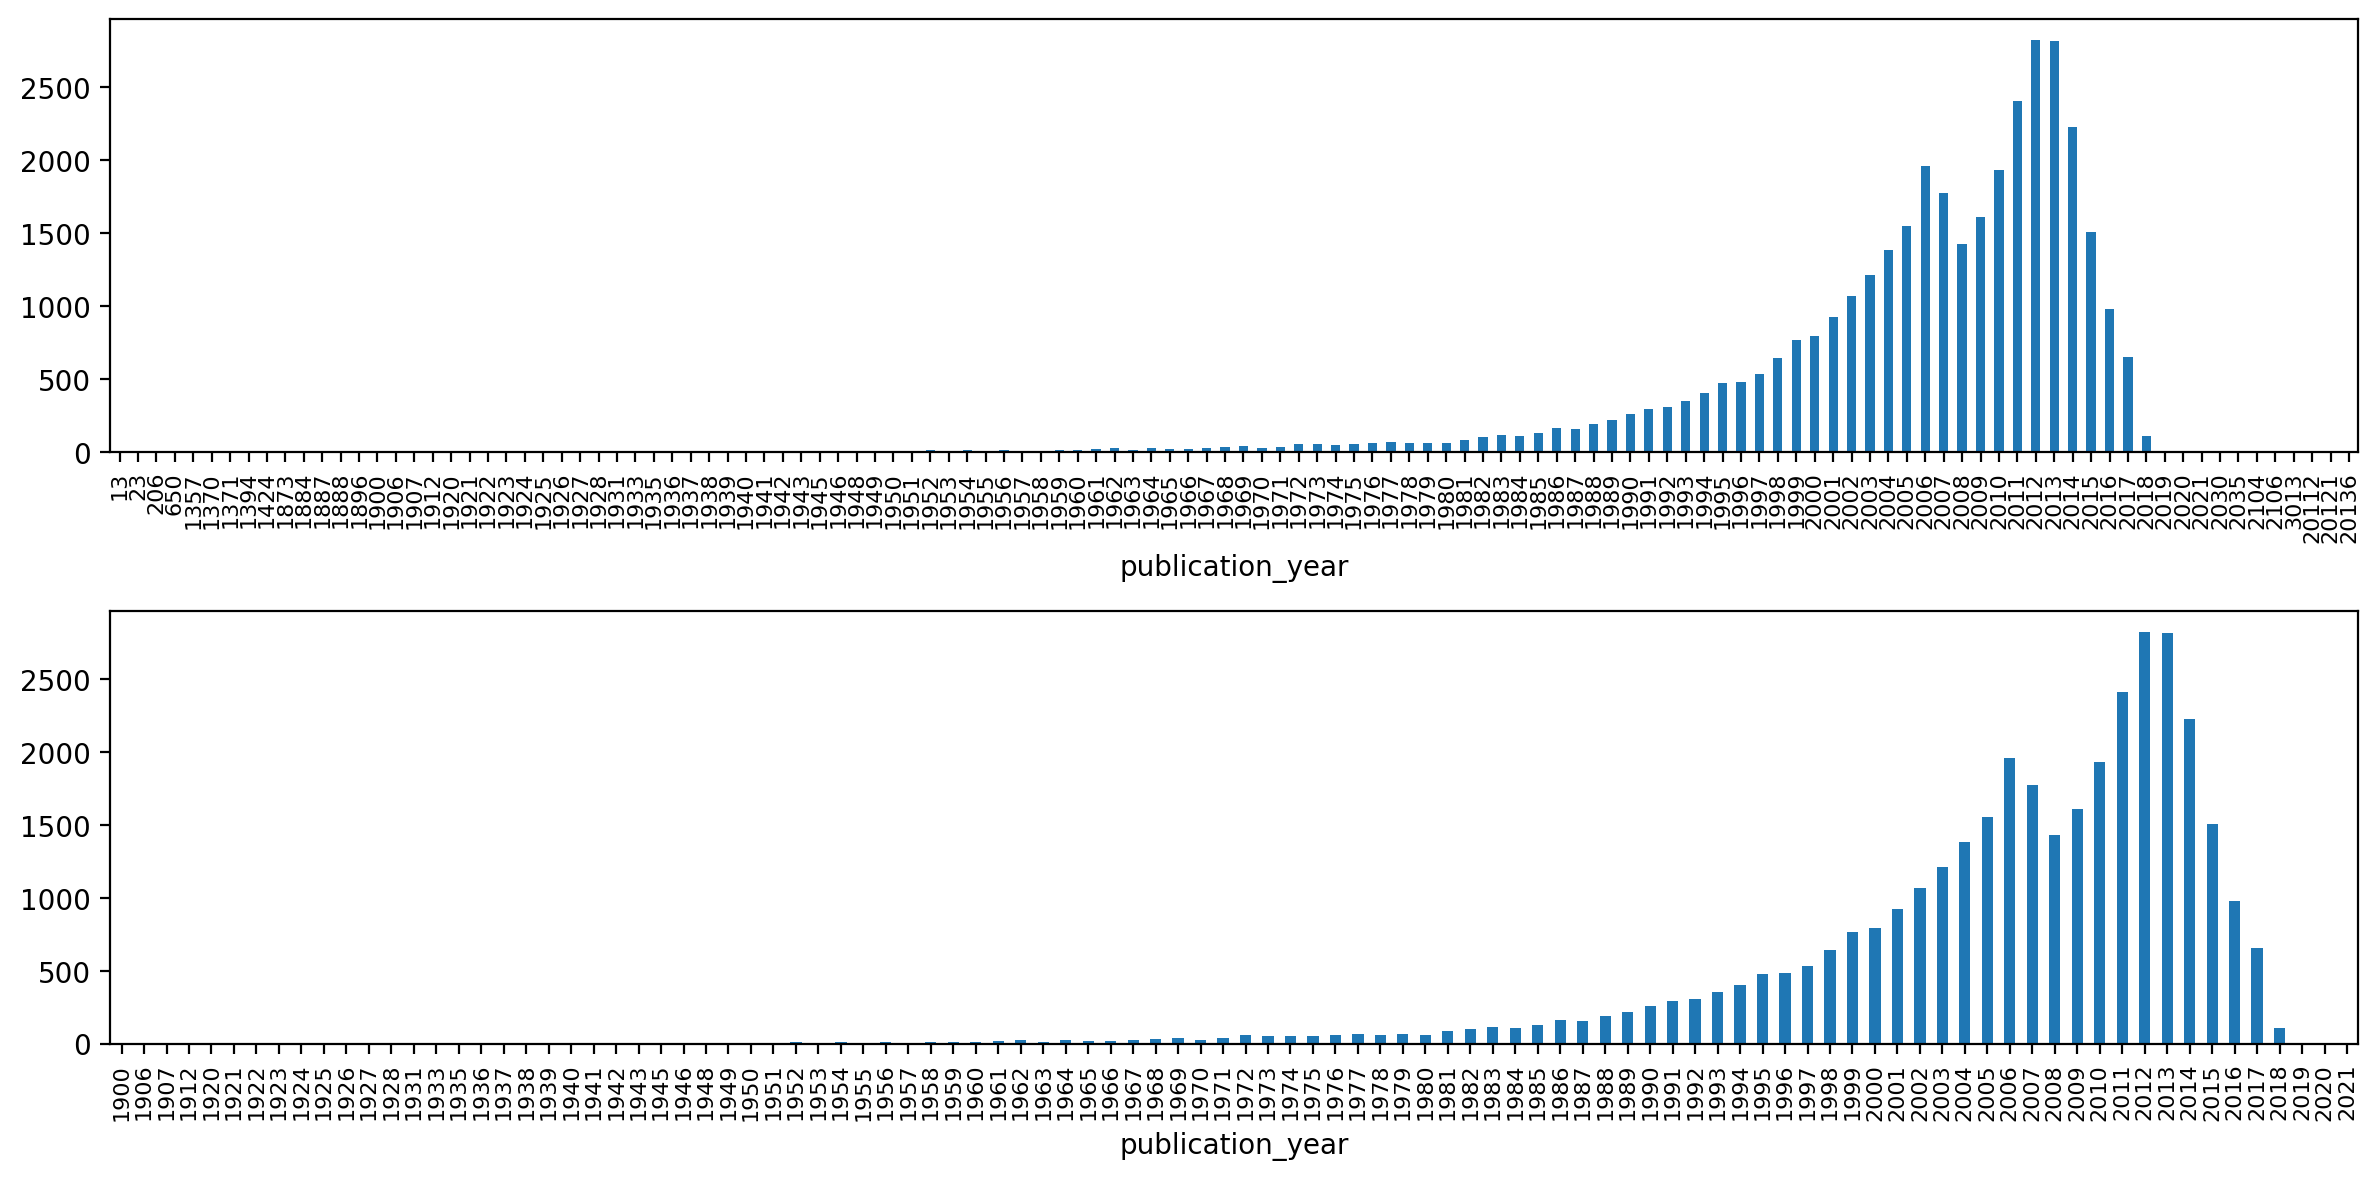

In [11]:
# распределение книг по годам публикации

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
books["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

ax = axs[1]
books.query("publication_year >= 1900 and publication_year <= 2025")["publication_year"].value_counts().sort_index().plot(kind="bar", ax=ax)
ax.tick_params(axis='x', labelsize=8)

fig.tight_layout()

# События по месяцам

In [12]:
from pandas.tseries.offsets import MonthEnd

interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date

In [13]:
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()

In [14]:
interactions_by_month

,started_at_month,events,users
0,2007-01-01,1993,1071
1,2007-02-01,201,135
2,2007-03-01,222,152
3,2007-04-01,201,135
4,2007-05-01,204,138
...,...,...,...
127,2017-08-01,202129,93040
128,2017-09-01,172187,82694
129,2017-10-01,108107,58076
130,2017-11-01,565,475


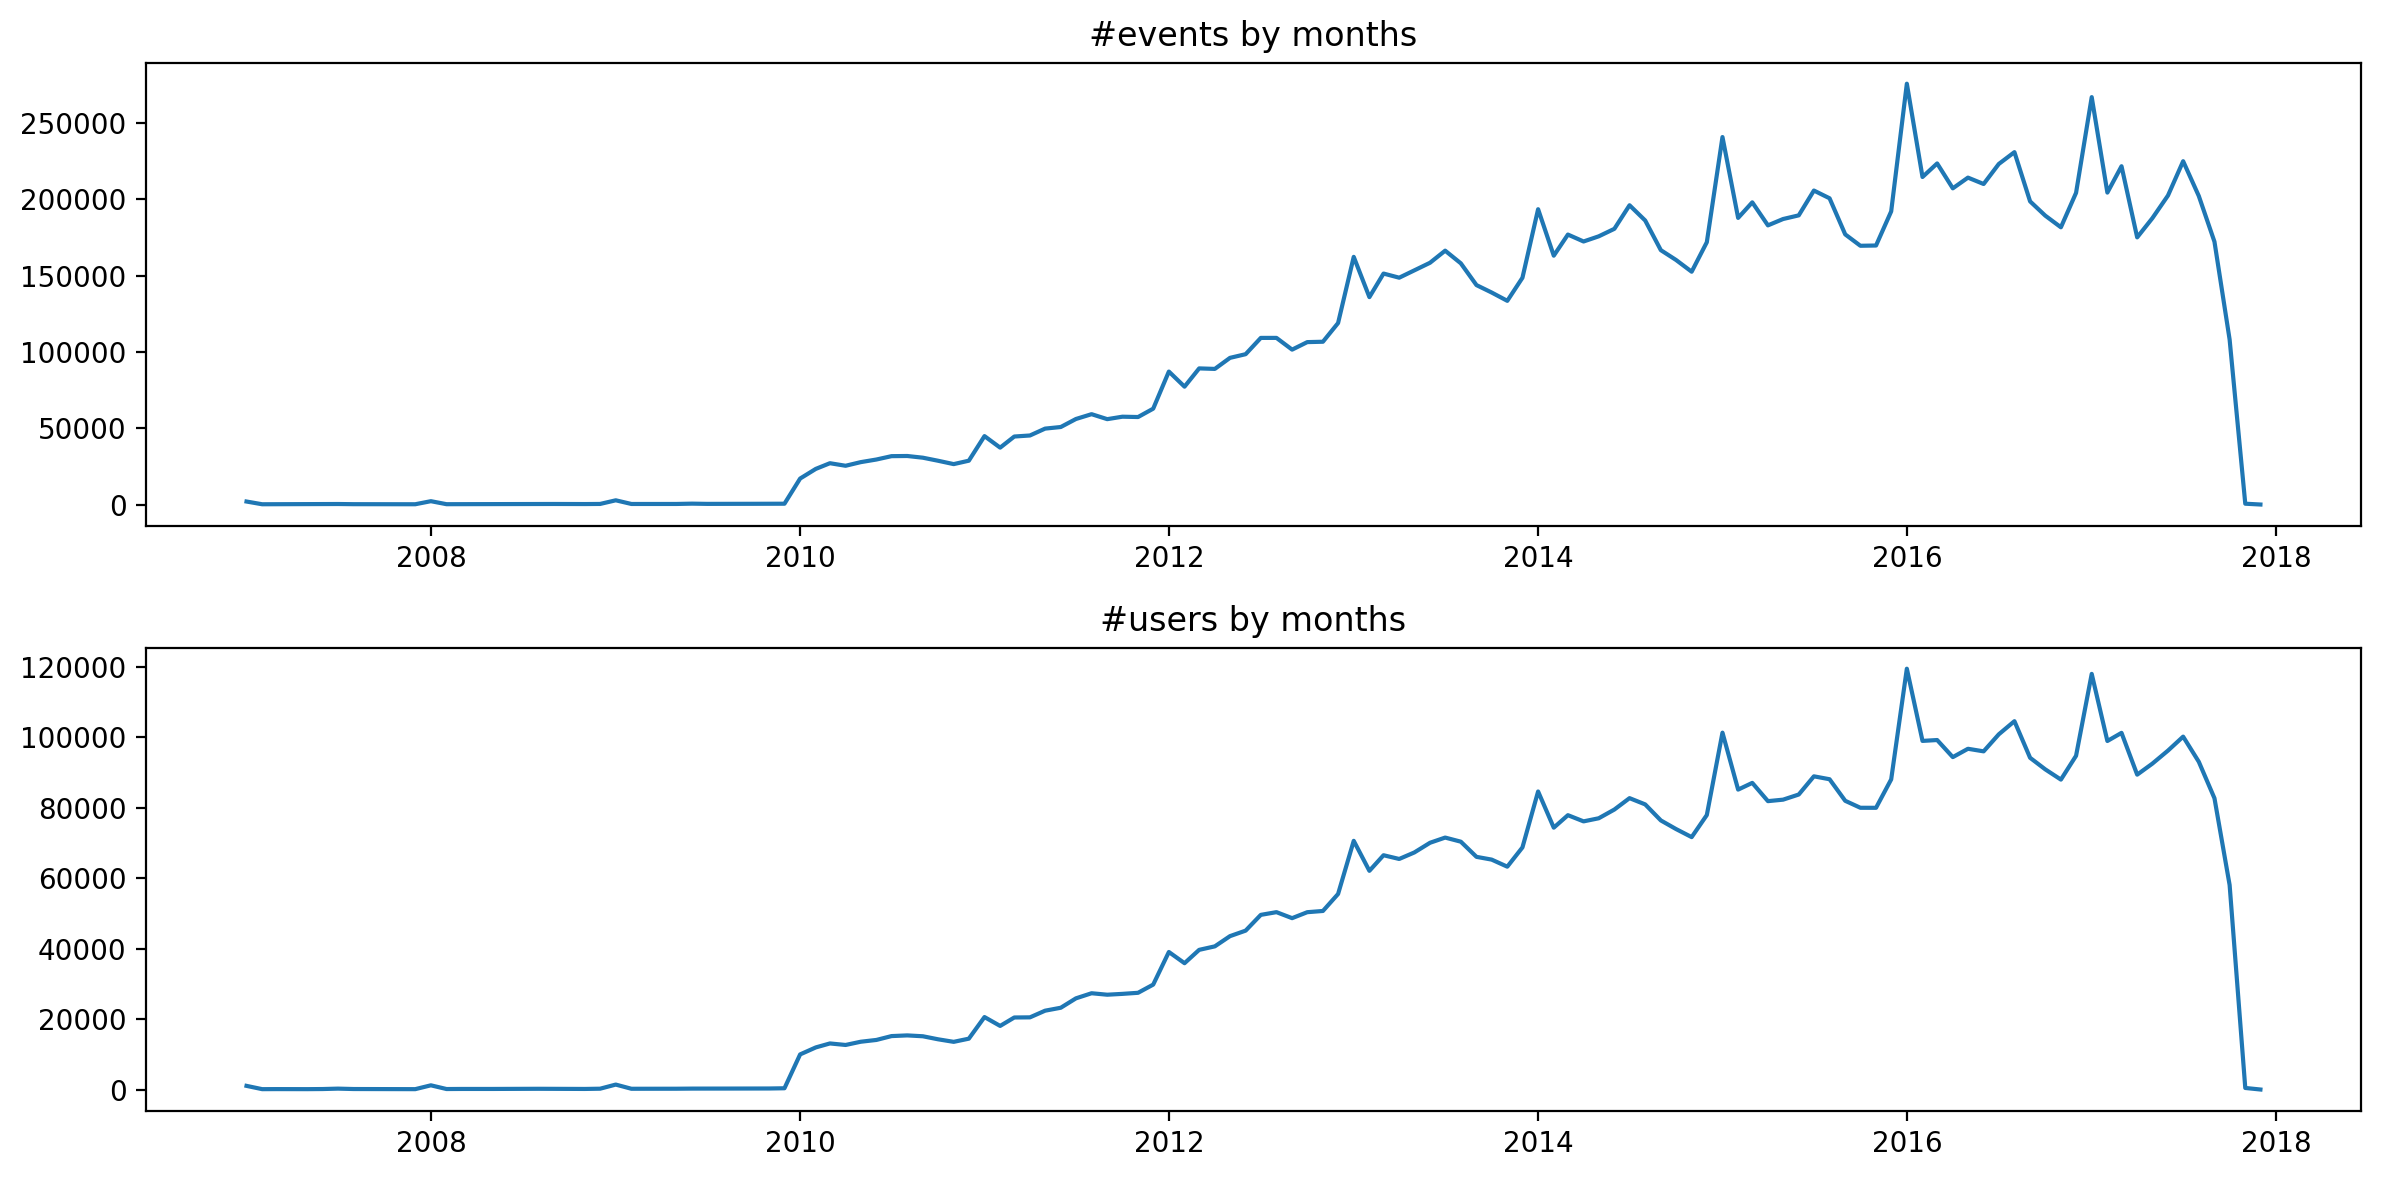

In [15]:
# распределение взаимодействий по годам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

In [16]:
#Оценка количества пользователей
num_users = interactions['user_id'].nunique()
print(f"Количество пользователей: {num_users}")

Количество пользователей: 542657


In [17]:
#Среднее количество прочитанных книг на пользователя
# Фильтруем только те записи, где книга была прочитана (is_read = True)
read_books = interactions[interactions['is_read'] == True]
average_books_per_user = read_books.groupby('user_id').size().mean()
print(f"Среднее количество прочитанных книг на пользователя: {average_books_per_user}")

Среднее количество прочитанных книг на пользователя: 23.7542941489744


In [18]:
# Фильтруем прочитанные книги без рейтинга
unrated_books = read_books[read_books['rating'] == 0]
percentage_unrated = (unrated_books.shape[0] / read_books.shape[0]) * 100
print(f"Доля прочитанных книг без рейтинга: {percentage_unrated}%")

Доля прочитанных книг без рейтинга: 8.158546097051502%


/home/avoskov/sprint4/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/avoskov/sprint4/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/avoskov/sprint4/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


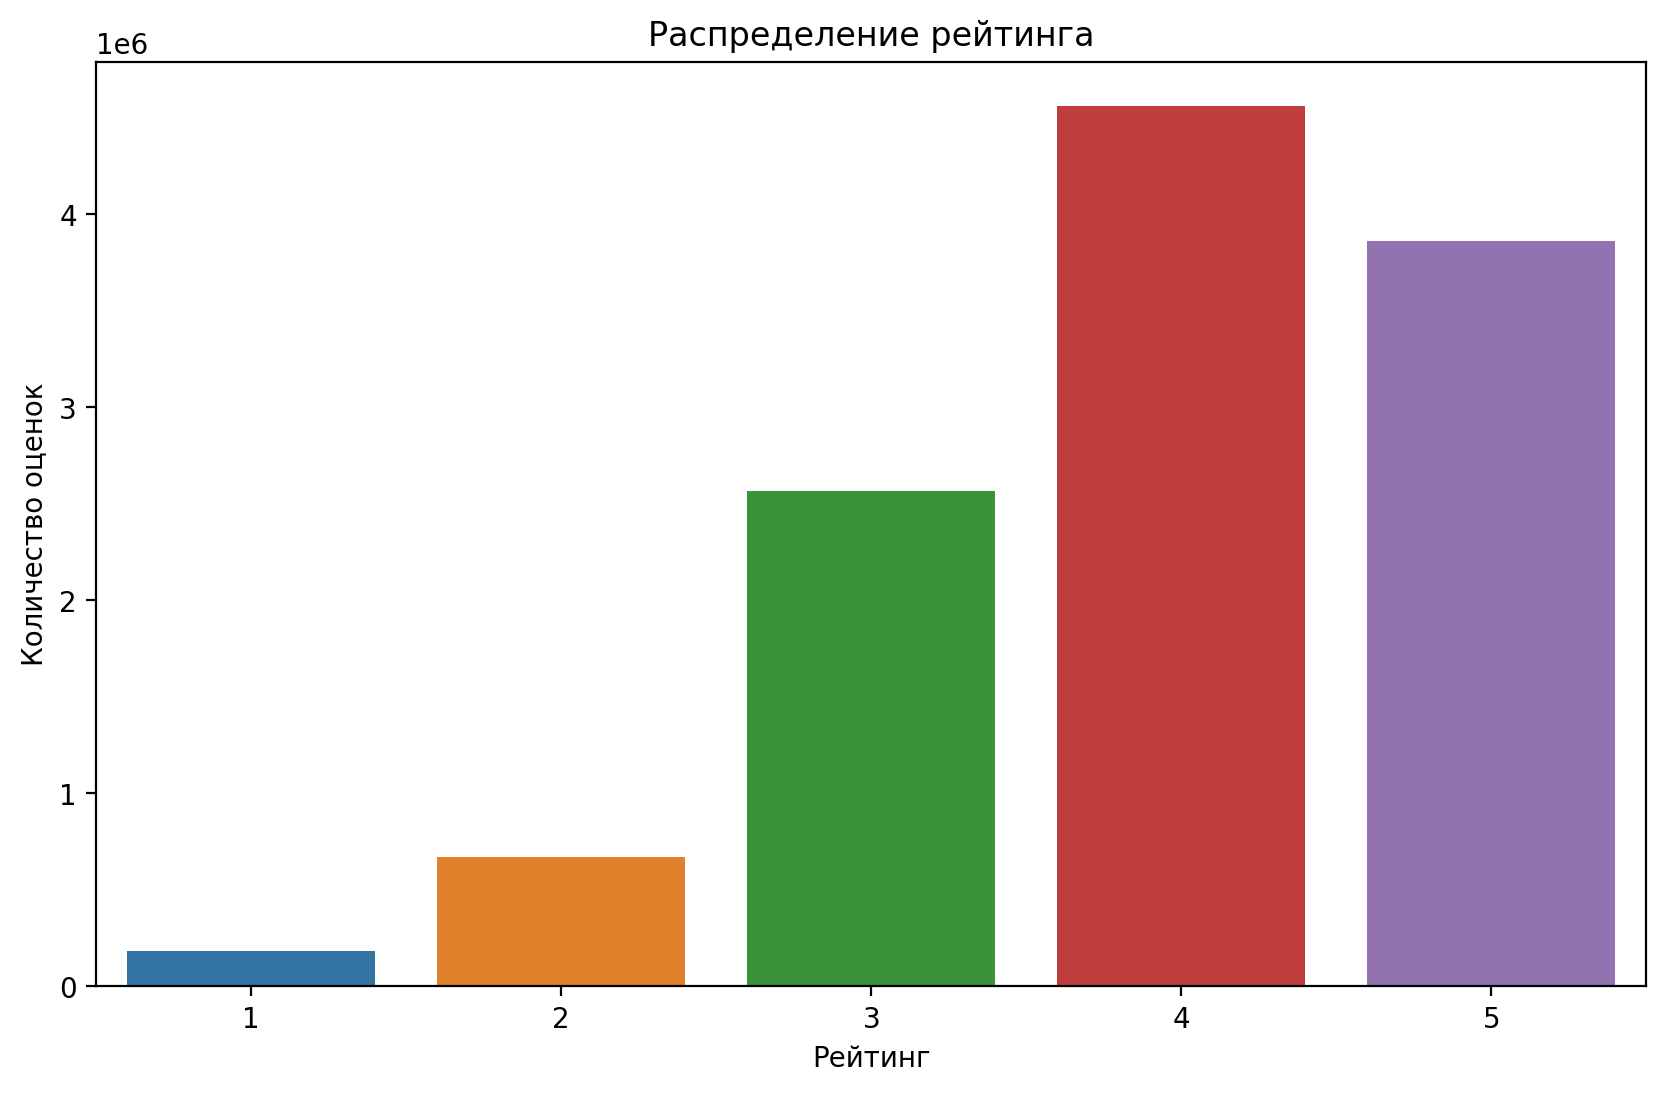

In [21]:
# Распределение рейтинга
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=interactions[interactions['rating'] > 0])
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.show()

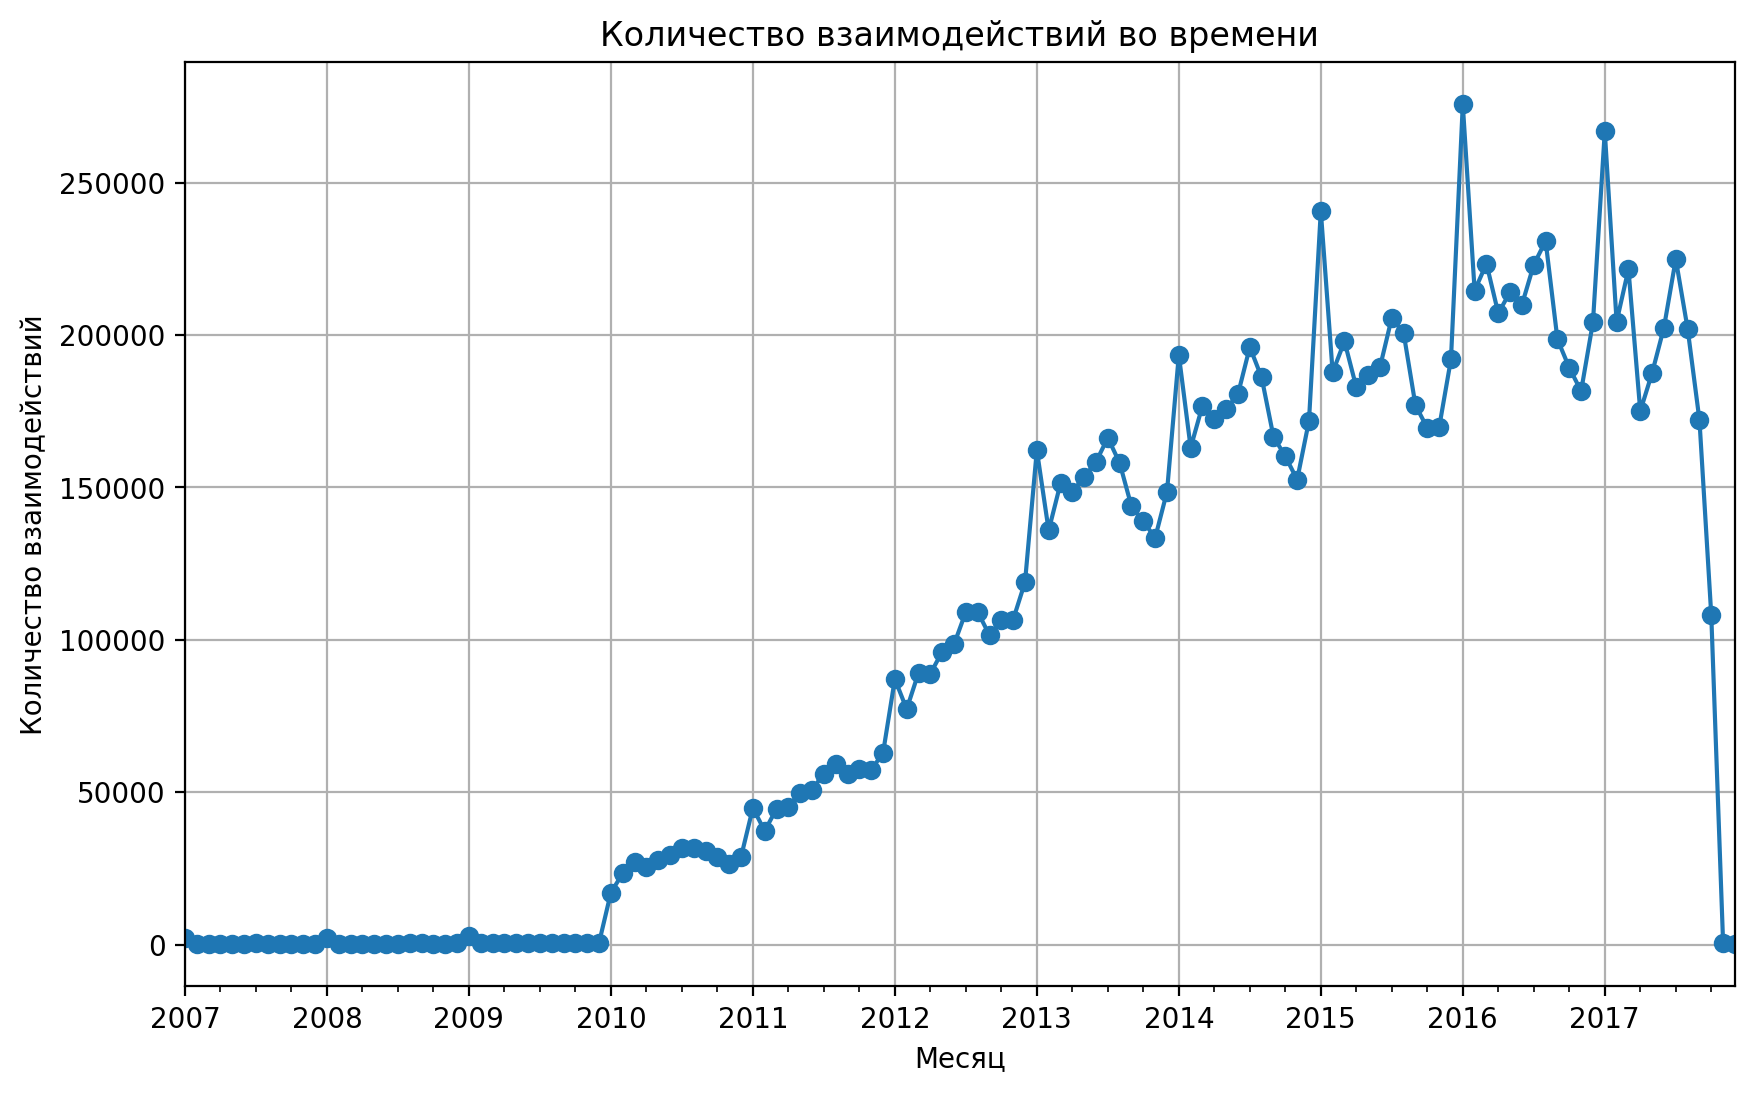

In [24]:
# Преобразуем столбцы дат в формат datetime
interactions['started_at'] = pd.to_datetime(interactions['started_at'])
interactions['read_at'] = pd.to_datetime(interactions['read_at'])

# Группируем данные по месяцу начала чтения
monthly_interactions = interactions.groupby(interactions['started_at'].dt.to_period('M')).size()
monthly_interactions.plot(figsize=(10, 6), marker='o')
plt.title('Количество взаимодействий во времени')
plt.xlabel('Месяц')
plt.ylabel('Количество взаимодействий')
plt.grid(True)
plt.show()

# Преобработка

Примем новые именования:
- books -> items (более обобщённое название)
- interactions -> events (несколько короче, удобнее в коде)

In [52]:
items = books.copy()
events = interactions.copy()

In [53]:
del books
del interactions

In [54]:
# Сохраняем исходное количество событий
initial_event_count = events.shape[0]

In [55]:
# оставим события только до ноября 2017

event_cutoff_date = pd.to_datetime("2017-11-01").date()
events = events.query("started_at < @event_cutoff_date and read_at < @event_cutoff_date").copy()
event_count_after_date_filter = events.shape[0]

# Ваш код здесь

In [56]:
# Переименование столбцов
events.rename(columns={'book_id': 'item_id'}, inplace=True)
items.rename(columns={'book_id': 'item_id'}, inplace=True)

In [57]:
# Переименование DataFrame
items.rename(columns={'books': 'items'}, inplace=True)
events.rename(columns={'interactions': 'events'}, inplace=True)

In [58]:
# Удаление событий без рейтинга
events = events[events['rating'] > 0]
event_count_after_rating_filter = events.shape[0]

In [59]:
# Оставляем только те события, где пользователь прочитал книгу (is_read=True)
events = events[events['is_read'] == True]
event_count_after_read_filter = events.shape[0]

In [60]:
# Фильтрация пользователей с двумя и более прочитанными книгами
user_counts = events['user_id'].value_counts()
filtered_users = user_counts[user_counts >= 2].index
events = events[events['user_id'].isin(filtered_users)]
event_count_after_user_filter = events.shape[0]

In [61]:
# Перекодировка идентификаторов пользователей в числовой формат
user_id_mapping = {user_id: idx for idx, user_id in enumerate(sorted(events['user_id'].unique()), start=1000000)}
events['user_id'] = events['user_id'].map(user_id_mapping)


In [62]:
# Сортировка идентификаторов пользователей и книг
items.sort_values(by='item_id', inplace=True)
events.sort_values(by='user_id', inplace=True)

In [63]:
# Очистка ненужных столбцов, если они есть
events.drop(columns=['started_at', 'read_at', 'is_read'], inplace=True)

In [64]:
# Вывод количества событий до и после каждого шага фильтрации
print(f"Исходное количество событий: {initial_event_count}")
print(f"Количество событий после фильтрации по дате: {event_count_after_date_filter}")
print(f"Количество событий после фильтрации по рейтингу: {event_count_after_rating_filter}")
print(f"Количество событий после фильтрации по прочтению: {event_count_after_read_filter}")
print(f"Количество событий после фильтрации по количеству прочитанных книг пользователей: {event_count_after_user_filter}")

Исходное количество событий: 12890434
Количество событий после фильтрации по дате: 12887523
Количество событий после фильтрации по рейтингу: 11836282
Количество событий после фильтрации по прочтению: 11836282
Количество событий после фильтрации по количеству прочитанных книг пользователей: 11751086


In [65]:
# Вычисление доли оставшихся событий
final_event_count = events.shape[0]
fraction_remaining_events = final_event_count / initial_event_count
print(f"Доля оставшихся событий: {fraction_remaining_events:.2%}")

Доля оставшихся событий: 91.16%


In [66]:
# Определение нового идентификатора для пользователя с изначальным идентификатором 8f50136afeb65c55cec7b3d306c24b03
original_user_id = '8f50136afeb65c55cec7b3d306c24b03'
if original_user_id in user_id_mapping:
    new_user_id = user_id_mapping[original_user_id]
    print(f"Новый идентификатор для пользователя с изначальным идентификатором {original_user_id}: {new_user_id}")
else:
    print(f"Пользователь с изначальным идентификатором {original_user_id} не найден в обработанных данных.")

Новый идентификатор для пользователя с изначальным идентификатором 8f50136afeb65c55cec7b3d306c24b03: 1241243


# Сохранение результатов

In [42]:
items.to_parquet("items.par")

In [43]:
events.to_parquet("events.par")